In [1]:
# from opfunu.cec_based.cec2017 import F52017
from mealpy import FloatVar, PSO, Tuner     # We will use this Tuner utility
# from mealpy.swarm_based import PSO
import numpy as np

from IPython.utils.io import capture_output

In [2]:

def rastrigin(x):
    """
    Rastrigin function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Rastrigin function at the given point.
    """
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

n=5

lb = [-5.12] * n
ub = [5.12] * n

p1 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": rastrigin,
    "minmax": "min",
    "name": "Rastrigin function"
}


In [3]:
def ackley(x):
    """
    Ackley function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Ackley function at the given point.
    """
    a = 20
    b = 0.2
    c = 2 * np.pi

    term1 = -a * np.exp(-b * np.sqrt(np.sum(x**2) / len(x)))
    term2 = -np.exp(np.sum(np.cos(c * x) / len(x)))

    return term1 + term2 + a + np.exp(1)

n=5

lb = [-32.768] * n
ub = [32.768] * n

p2 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": ackley,
    "minmax": "min",
    "name": "Ackley function"
}

In [4]:
def rosenbrock(x):
    """
    Rosenbrock function.

    Parameters:
    - x: Input vector (numpy array).

    Returns:
    - Value of the Rosenbrock function at the given point.
    """
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

n=20

lb = [-5] * n
ub = [10] * n

p3 = {
    "bounds": FloatVar(lb=lb, ub=ub),
    "obj_func": rosenbrock,
    "minmax": "min",
    "name": "Rosenbrock function"
}

In [5]:
alpha = 5
x = 100
x_max = 1000
w_start = 1.5
w_end = 0.3


beta = (1/1+(alpha*x/x_max))
w = w_end + (w_start - w_end)*beta
print(w)

2.0999999999999996


In [6]:
[round(3 - i * 0.1, 2) for i in range(21)]

[3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1]

In [7]:
# c1 + c2 = 4 (best practise)

paras_pso_grid = {
    "epoch": [500],
    "pop_size": [100],
    "c1": [round(3 - i * 0.1, 2) for i in range(20)], # =0 -> fast leading to first local minimum
    "c2": [round(3 - i * 0.1, 2) for i in range(20)], # =0 -> slowly searching around it's position
    # "w_min": [0.4]
    # "w_max": [0.9]
    "w": [0.4]
}

term = {
    "max_epoch": 5000,
    "max_time": 30,
    "max_fe": 10000
}

# Start here

In [8]:
prob = p3

# p1 ... "Rastrigin function" - eggholder
# p2 ... "Ackley function" - mountain
# p3 ... "Rosenbrock function" - wave

In [9]:
### Define model and parameter grid of the model (just like ParameterGrid / GridSearchCV)
model = PSO.OriginalPSO()
tuner = Tuner(model, paras_pso_grid)

In [10]:
with capture_output() as captured:
    ## Try to run this optimizer on this problem 5 times (n_trials = 5). 
    ## Get the best model by mean value of all trials
    tuner.execute(problem=prob, n_trials=10, termination=term)

    ## Better to save the tunning results to CSV for later usage
    tuner.export_results()

    ## Also better to draw the figures that are available.
    tuner.export_figures()


print("------------------------------------")
print("------------------------------------")
## Print out the best pameters
print(f"Best parameter: {tuner.best_params}")

## Print out the best score of the best parameter
print(f"Best score: {tuner.best_score}")

## Print out the algorithm with the best parameter
print(f"Best Optimizer: {tuner.best_algorithm}")

------------------------------------
------------------------------------
Best parameter: {'epoch': 500, 'pop_size': 100, 'c1': 2.5, 'c2': 1.3, 'w': 0.4}
Best score: 404.7521294331979
Best Optimizer: OriginalPSO(epoch=500, pop_size=100, c1=2.5, c2=1.3, w=0.4)


In [11]:
## Print out the best pameters
print(f"Best parameter: {tuner.best_params}")

## Print out the best score of the best parameter
print(f"Best score: {tuner.best_score}")

## Print out the algorithm with the best parameter
print(f"Best Optimizer: {tuner.best_algorithm}")

Best parameter: {'epoch': 500, 'pop_size': 100, 'c1': 2.5, 'c2': 1.3, 'w': 0.4}
Best score: 404.7521294331979
Best Optimizer: OriginalPSO(epoch=500, pop_size=100, c1=2.5, c2=1.3, w=0.4)


In [12]:
tuner

In [13]:
## Now we can even re-train the algorithm with the best parameter by calling resolve() function 
## Resolve() function will call the solve() function in algorithm with default problem parameter is removed. 
##    other parameters of solve() function is keeped and can be used.

g_best = tuner.resolve()
print("------------------------------------------------")
print("------------------------------------------------")
print(f"Best solution after re-solve: {g_best.solution}")
print(f"Best fitness after re-solve: {g_best.target.fitness}")

------------------------------------------------
------------------------------------------------
Best solution after re-solve: [0.83756309 0.70033411 0.48812654 0.23691431 0.0528597 ]
Best fitness after re-solve: 0.9624380594260626


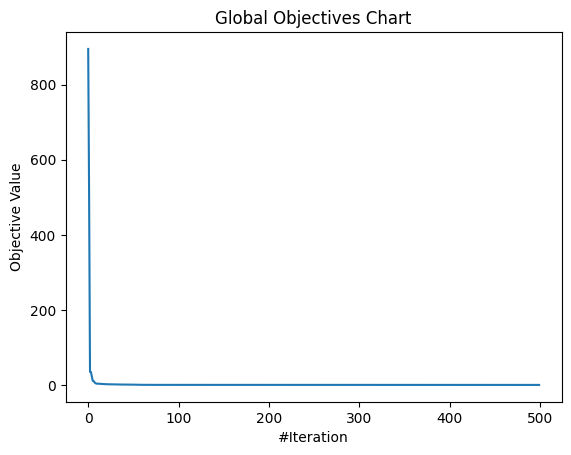

In [14]:
model.history.save_global_objectives_chart(filename="hello/goc")

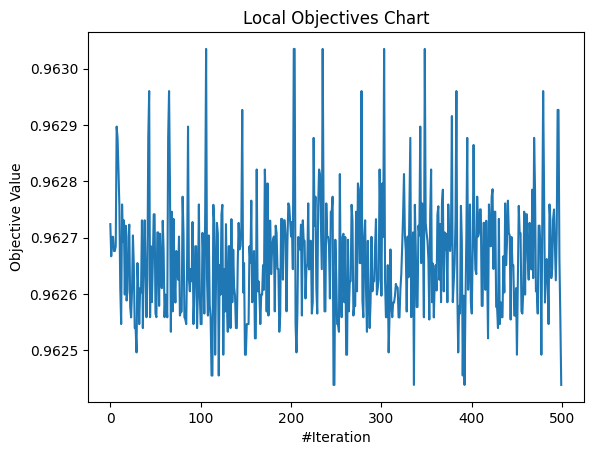

In [15]:
model.history.save_local_objectives_chart(filename="hello/loc")

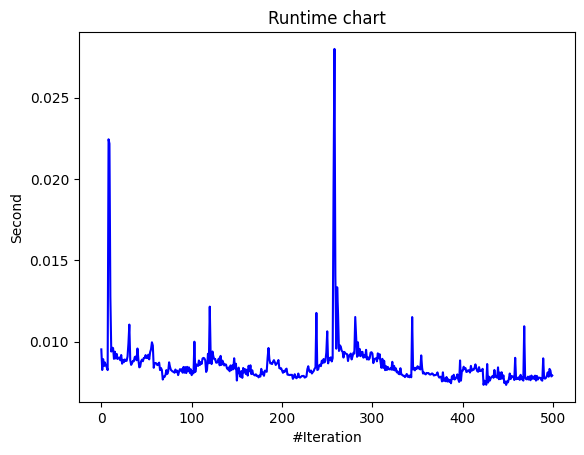

In [16]:
model.history.save_runtime_chart(filename="hello/rtc")

# this one is really good

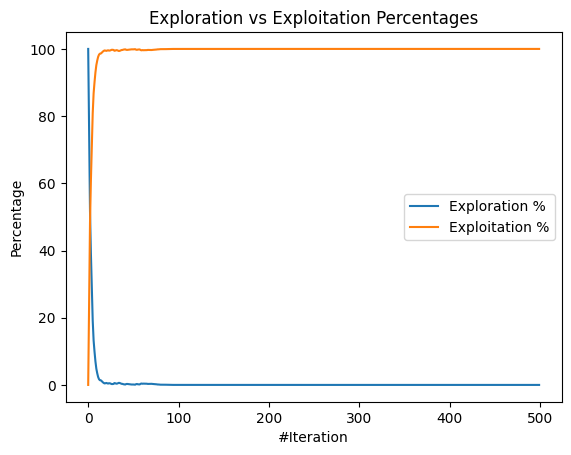

In [17]:
model.history.save_exploration_exploitation_chart(filename="hello/eec")

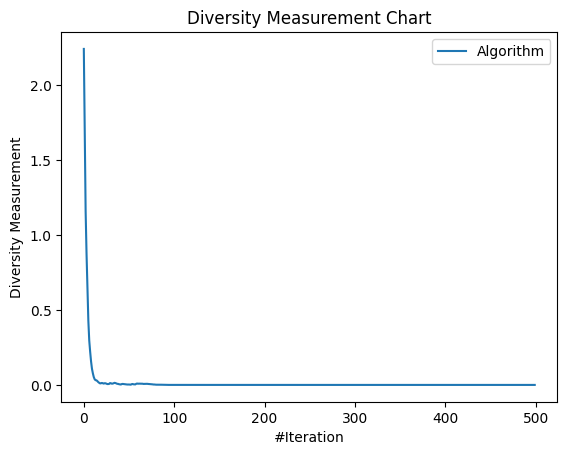

In [18]:
model.history.save_diversity_chart(filename="hello/dc")

# Will not run (not working in Python notebook)

In [19]:
# ## Try to run this optimizer on this problem 5 times (n_trials = 5).
# ## Get the best model by mean value of all trials
# ## Distribute to 4 CPU to run (n_jobs=4)
# tuner.execute(problem=p1, termination=term, n_trials=5, n_jobs=4, verbose=True)

# print(tuner.best_row)
# print(tuner.best_score)
# print(tuner.best_params)
# print(type(tuner.best_params))

# print(tuner.best_algorithm)
# ## Better to save the tuning results to CSV for later usage
# tuner.export_results()
# tuner.export_figures()

#     ## Now we can even re-train the algorithm with the best parameter by calling resolve() function
# ## Resolve() function will call the solve() function in algorithm with default problem parameter is removed.
# ##    other parameters of solve() function is keeped and can be used.
# g_best = tuner.resolve(mode="thread", n_workers=4, termination=term)

# ## Print out the best score of the best parameter
# print(g_best.solution, g_best.target.fitness)

# print(tuner.algorithm.problem.get_name())

# ## Print out the algorithm with the best parameter
# print(tuner.best_algorithm.get_name())